In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import os
from  IPython.display import Audio
from librosa import display
import librosa
import numpy as np
from scipy.io.wavfile import read as read_wav
import sklearn
import soundfile as sf
import scipy
import csv
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from joblib import parallel_backend

import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


os.chdir(r'C:\Users\777\Documents\dusha')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
podcast_train_cycle = pd.read_csv('dataset_podcast_cycle_200.csv')
crowd_train_cycle = pd.read_csv('dataset_crowd_cycle_200.csv')


In [3]:
podcast_train_cycle['dataset']= 'podcast'
crowd_train_cycle['dataset']= 'crowd'


In [4]:
train_features = pd.concat([crowd_train_cycle, podcast_train_cycle])
train_features = train_features.reset_index()
train_features.drop(columns=['index'], inplace=True)
train_features['label'] = train_features['label'].apply(lambda x: x.split()[1])
train_features.dropna(inplace=True)
train_features = train_features[train_features['label']!= 'other']
train_features

,audio_path,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,...,mfcc_std100,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,zero_cross_mn,zero_cross_std,label,dataset
0,ea0f98b720247329cb817138c2f628dd.wav,-416.31076,92.022140,8.281179,16.198270,-0.936501,-1.026557,-0.820926,-10.904892,-4.460922,...,1.590525,1769.289942,936.317929,2.566010,3767.441860,1491.496112,0.108731,0.104875,neutral,crowd
1,c7e4c534389f35adc8fa00ddbf92f998.wav,-400.15143,84.427025,16.300960,11.808659,2.761336,4.809444,-5.034426,-1.270584,0.656954,...,1.704078,1827.531272,1017.001684,1.433682,3625.863009,1681.535340,0.143762,0.124858,neutral,crowd
2,ca6e54cd9e7639f926c48618b3336990.wav,-279.96588,27.900133,30.750940,3.077618,-0.313272,-20.622698,-5.106816,-18.298481,-6.797584,...,1.711117,3330.293454,1219.107471,0.093200,6311.228198,1653.730558,0.299393,0.185990,neutral,crowd
3,92ccd6233ada1f5e1ac483bc33066271.wav,-426.60666,104.701850,11.115646,11.354801,-14.549412,-4.853274,-18.007412,-9.755260,-11.441398,...,1.720367,1443.698834,673.001109,3.386784,3057.321948,1248.057067,0.063891,0.057722,neutral,crowd
4,82005da08d4587db56957f8a3bc2baf0.wav,-279.16330,103.659410,6.708391,29.906364,-6.433694,19.018402,-4.211590,1.347289,1.146383,...,1.527350,1472.708407,832.421421,1.976157,2953.670058,1400.941709,0.072442,0.075619,neutral,crowd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161058,55a54d98443cb0edc9aa78d79e23db94.wav,-245.85529,84.940865,-12.777506,17.208485,-6.787427,-10.581666,-0.936245,-20.021072,3.627672,...,1.829978,1865.695720,1011.843927,1.565729,3534.020712,1881.765570,0.103899,0.091382,positive,podcast
161059,1ab446e4e07e257f185718d60f0fa987.wav,-463.75940,53.512790,8.285305,34.208702,5.907460,13.610736,11.700046,-1.222025,-2.928603,...,1.560817,1842.780876,857.250247,0.946584,3809.093387,1531.443990,0.108066,0.110790,sad,podcast
161060,c9e515550d451c497c5434c1e12d61a9.wav,-315.61310,74.711970,-18.547485,16.810072,-12.642205,-15.554475,-14.981894,-13.651557,-13.390931,...,1.914348,2018.329616,1260.269732,0.858384,3566.542515,2053.109312,0.139597,0.101267,positive,podcast
161061,be1553e2d7651dfc6360db8594001262.wav,-255.33739,85.104324,-5.540671,14.614176,0.958284,2.827323,-11.727681,-11.495070,-10.617316,...,1.694642,1954.853940,818.945654,1.179521,3902.252907,1476.654659,0.148367,0.085568,positive,podcast


In [5]:
print(train_features.label.value_counts())

label
neutral     80011
sad         30890
positive    25310
angry       22567
Name: count, dtype: int64


In [6]:
X = train_features[train_features.columns.drop(['label', 'audio_path', 'dataset'])]
y = pd.DataFrame(train_features[train_features.columns[-2]])
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=123)


dic = {'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}
y_train = y_train['label'].map(dic)
y_train.dropna(inplace=True)
y_test = y_test['label'].map(dic)
y_test.dropna(inplace=True)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()
# Create a PyTorch dataset and dataloader
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=128, shuffle=True)

In [7]:
for x,y in dataloader_train:
    print(x.shape)
    print(y)
    break

torch.Size([128, 207])
tensor([1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0,
        0, 2, 3, 1, 3, 1, 0, 0, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 0, 0, 2, 1, 0, 0,
        3, 0, 0, 1, 1, 0, 3, 3, 1, 3, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        2, 2, 0, 2, 0, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 3, 3, 3,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 3, 1, 2, 1, 2, 0, 0, 1,
        0, 0, 0, 2, 1, 3, 2, 0])


In [103]:
class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i-1]*2, hidden_dims[i], bidirectional=True))

        self.fc1 = nn.Linear(hidden_dims[-1]*2, 512)  # Добавляем новый полносвязный слой
        self.fc2 = nn.Linear(512, output_dim)  # Изменяем выходной слой на 4 нейрона
        self.hidden_dims = hidden_dims

        self.fc = nn.Linear(hidden_dims[-1]*2, output_dim)
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden


    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
        out = out.squeeze(0)
        out = torch.relu(self.fc1(out))  # Применяем ReLU к выходу нового полносвязного слоя
        out = torch.log_softmax(self.fc2(out), dim=1)  # Применяем log_softmax к выходному слою
        return out, hidden


model = VariableHiddenDimBiLSTM(input_dim=207, hidden_dims=[4096, 2048, 1024], output_dim=4)


model.to(device)
X_test = X_test.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:

import torch.nn.functional as F


class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i - 1] * 2, hidden_dims[i], bidirectional=True))

        self.fc1 = nn.Linear(hidden_dims[-1] * 2, 512)  # Добавляем новый полносвязный слой
        self.fc2 = nn.Linear(512, output_dim)  # Изменяем выходной слой на 4 нейрона
        self.hidden_dims = hidden_dims

        self.fc = nn.Linear(hidden_dims[-1] * 2, output_dim)
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden

    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
            if i == 0:  # Добавляем Dropout после первого скрытого слоя (4096)
                out = F.dropout(out, p=0.7, training=self.training)
            if i == 1:  # Добавляем Dropout после второго скрытого слоя (2048)
                out = F.dropout(out, p=0.6, training=self.training)
            if i == 2:  # Добавляем Dropout после второго скрытого слоя (2048)
                out = F.dropout(out, p=0.5, training=self.training)
        out = out.squeeze(0)
        out = torch.relu(self.fc1(out))
        out = torch.log_softmax(self.fc2(out), dim=1)
        return out, hidden


model = VariableHiddenDimBiLSTM(input_dim=207, hidden_dims=[4096, 2048, 1024], output_dim=4)

model.to(device)
X_test = X_test.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000001, amsgrad=True)
#optimizer = torch.optim.LBFGS(model.parameters(), lr=0.001)

In [9]:
from tqdm import tqdm
def accuracy(y_pred, y_acc):
    with torch.no_grad():
        return torch.sum(torch.max(torch.exp(y_pred), dim=1)[1] == y_acc).item() / len(y_acc)
def f1_f(y_pred, y_true):
    with torch.no_grad():
        y_pred = torch.max(torch.exp(y_pred), dim=1)[1].cpu().numpy()
        y_true = y_true.cpu().numpy()
        return f1_score(y_true, y_pred, average='weighted')

In [14]:
%%time
epochs = 10
trf1 = []
tsf1 =[]
tsa=[]
tra=[]
trls = []
tsls = []
for e in range(1, epochs + 1):
    #if e == 7:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
    #if e == 10:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)
    #if e == 15:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.00005, weight_decay=0.001)
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y = batch
        x, y = x.cuda(), y.cuda()
        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step(closure)

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0
    model.eval()
    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y = batch
            x, y = x.cuda(), y.cuda()

            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y)

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))


#torch.save(model.state_dict(), 'BILSTM.path')

  0%|          | 0/894 [00:00<?, ?it/s]


TypeError: VariableHiddenDimBiLSTM.forward() missing 1 required positional argument: 'hidden'

In [62]:
epochs = 15
ideal = 0.6406
for e in range(1, epochs + 1):
    #if e == 7:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
    #if e == 10:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)
    #if e == 15:
        #optimizer = torch.optim.Adam(model.parameters(), lr=0.00005, weight_decay=0.001)
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y = batch
        x, y = x.cuda(), y.cuda()
        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0
    model.eval()
    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y = batch
            x, y = x.cuda(), y.cuda()

            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y)

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e+30, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))
    if ideal < test_f1:
        torch.save(model.state_dict(), f'BILSTM_last_{e}.path')


100%|██████████| 348/348 [00:02<00:00, 173.41it/s]


Epoch   31 | Train Loss 0.6936 | Train Acc 0.7226 | Train F1 0.7173 | Test Loss 0.9133 | Test Acc 0.6503 | Test F1 0.6405


100%|██████████| 348/348 [00:01<00:00, 174.97it/s]


Epoch   32 | Train Loss 0.6860 | Train Acc 0.7271 | Train F1 0.7219 | Test Loss 0.9315 | Test Acc 0.6476 | Test F1 0.6392


100%|██████████| 348/348 [00:01<00:00, 176.64it/s]


Epoch   33 | Train Loss 0.6794 | Train Acc 0.7283 | Train F1 0.7233 | Test Loss 0.9223 | Test Acc 0.6497 | Test F1 0.6417


100%|██████████| 348/348 [00:01<00:00, 177.01it/s]


Epoch   34 | Train Loss 0.6696 | Train Acc 0.7348 | Train F1 0.7298 | Test Loss 0.9127 | Test Acc 0.6503 | Test F1 0.6432


100%|██████████| 348/348 [00:01<00:00, 180.71it/s]


Epoch   35 | Train Loss 0.6625 | Train Acc 0.7370 | Train F1 0.7324 | Test Loss 0.9267 | Test Acc 0.6512 | Test F1 0.6420


100%|██████████| 348/348 [00:01<00:00, 178.34it/s]


Epoch   36 | Train Loss 0.6547 | Train Acc 0.7395 | Train F1 0.7349 | Test Loss 0.9416 | Test Acc 0.6504 | Test F1 0.6429


100%|██████████| 348/348 [00:01<00:00, 177.63it/s]


Epoch   37 | Train Loss 0.6476 | Train Acc 0.7442 | Train F1 0.7398 | Test Loss 0.9389 | Test Acc 0.6499 | Test F1 0.6419


100%|██████████| 348/348 [00:01<00:00, 176.25it/s]


Epoch   38 | Train Loss 0.6412 | Train Acc 0.7449 | Train F1 0.7407 | Test Loss 0.9612 | Test Acc 0.6509 | Test F1 0.6416


100%|██████████| 348/348 [00:01<00:00, 178.05it/s]


Epoch   39 | Train Loss 0.6314 | Train Acc 0.7491 | Train F1 0.7449 | Test Loss 0.9609 | Test Acc 0.6502 | Test F1 0.6406


100%|██████████| 348/348 [00:01<00:00, 174.55it/s]


Epoch   40 | Train Loss 0.6286 | Train Acc 0.7520 | Train F1 0.7479 | Test Loss 0.9485 | Test Acc 0.6493 | Test F1 0.6440


100%|██████████| 348/348 [00:01<00:00, 177.07it/s]


Epoch   41 | Train Loss 0.6226 | Train Acc 0.7539 | Train F1 0.7500 | Test Loss 0.9689 | Test Acc 0.6487 | Test F1 0.6386


100%|██████████| 348/348 [00:01<00:00, 178.20it/s]


Epoch   42 | Train Loss 0.6114 | Train Acc 0.7571 | Train F1 0.7533 | Test Loss 0.9613 | Test Acc 0.6517 | Test F1 0.6402


100%|██████████| 348/348 [00:01<00:00, 178.99it/s]


Epoch   43 | Train Loss 0.6042 | Train Acc 0.7616 | Train F1 0.7580 | Test Loss 0.9819 | Test Acc 0.6501 | Test F1 0.6405


100%|██████████| 348/348 [00:01<00:00, 178.33it/s]


Epoch   44 | Train Loss 0.6001 | Train Acc 0.7625 | Train F1 0.7588 | Test Loss 0.9789 | Test Acc 0.6521 | Test F1 0.6432


100%|██████████| 348/348 [00:01<00:00, 176.00it/s]


Epoch   45 | Train Loss 0.5939 | Train Acc 0.7657 | Train F1 0.7624 | Test Loss 0.9685 | Test Acc 0.6513 | Test F1 0.6426


In [29]:
epochs = 7
trf1 = []
tsf1 =[]
tsa=[]
tra=[]
trls = []
tsls = []
for e in range(1, epochs + 1):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y = batch
        x, y = x.cuda(), y.cuda()

        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0

    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y = batch
            x, y = x.cuda(), y.cuda()

            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y)

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))


    torch.save(model.state_dict(), f'BILSTM_{e}.path')

100%|██████████| 348/348 [00:01<00:00, 195.72it/s]


Epoch    1 | Train Loss 1.0049 | Train Acc 0.5749 | Train F1 0.5432 | Test Loss 0.9634 | Test Acc 0.5931 | Test F1 0.5804


100%|██████████| 348/348 [00:01<00:00, 196.01it/s]


Epoch    2 | Train Loss 0.9188 | Train Acc 0.6189 | Train F1 0.6035 | Test Loss 0.9146 | Test Acc 0.6187 | Test F1 0.5989


100%|██████████| 348/348 [00:01<00:00, 195.57it/s]


Epoch    3 | Train Loss 0.8555 | Train Acc 0.6498 | Train F1 0.6385 | Test Loss 0.8978 | Test Acc 0.6311 | Test F1 0.6187


100%|██████████| 348/348 [00:01<00:00, 197.15it/s]


Epoch    4 | Train Loss 0.7892 | Train Acc 0.6816 | Train F1 0.6735 | Test Loss 0.8830 | Test Acc 0.6400 | Test F1 0.6332


100%|██████████| 348/348 [00:01<00:00, 193.56it/s]


Epoch    5 | Train Loss 0.7003 | Train Acc 0.7196 | Train F1 0.7143 | Test Loss 0.9077 | Test Acc 0.6396 | Test F1 0.6235


100%|██████████| 348/348 [00:01<00:00, 196.69it/s]


Epoch    6 | Train Loss 0.5830 | Train Acc 0.7693 | Train F1 0.7660 | Test Loss 0.9701 | Test Acc 0.6397 | Test F1 0.6370


100%|██████████| 348/348 [00:01<00:00, 199.45it/s]


Epoch    7 | Train Loss 0.4453 | Train Acc 0.8264 | Train F1 0.8249 | Test Loss 1.1020 | Test Acc 0.6340 | Test F1 0.6291


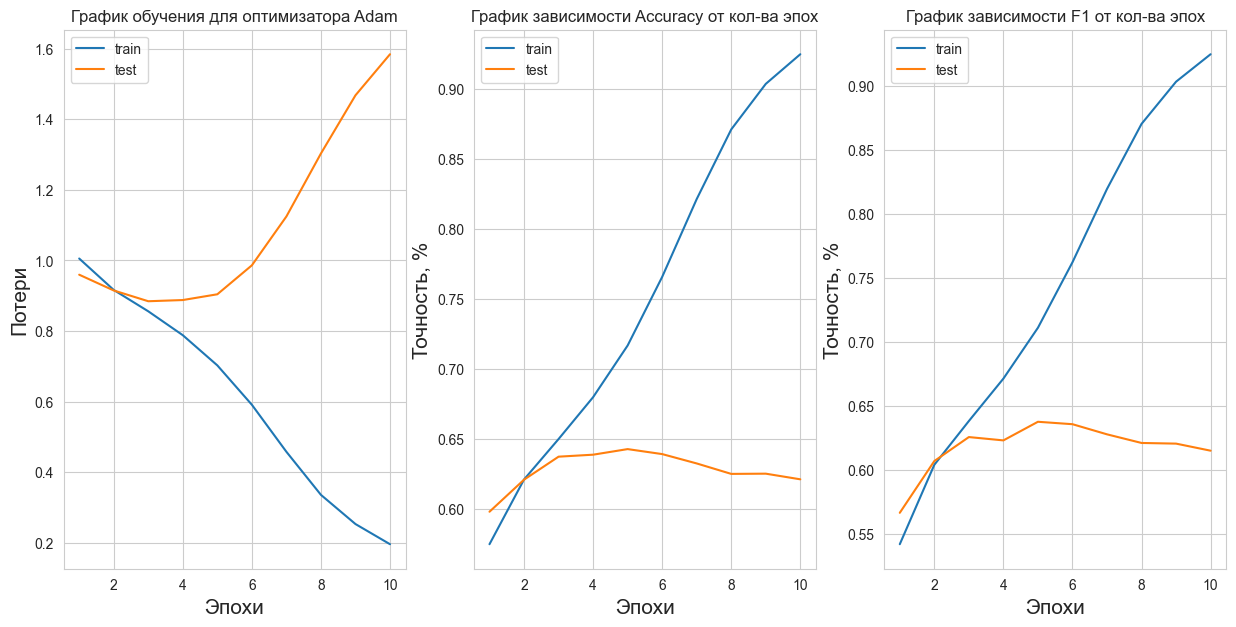

In [106]:

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.plot(range(1, e + 1), trls, label="train")
plt.plot(range(1, e + 1), tsls, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора Adam")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(1, e + 1), tra, label="train")
plt.plot(range(1, e + 1), tsa, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.subplot(1, 3, 3)
plt.plot(range(1, e + 1), trf1, label="train")
plt.plot(range(1, e + 1), tsf1, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости F1 от кол-ва эпох")
plt.grid
plt.show()

In [108]:
model = VariableHiddenDimBiLSTM(input_dim=207, hidden_dims=[4096, 2048, 1024], output_dim=4)


model.to(device)
state_dict = torch.load('BILSTM_last_10.path')
model.load_state_dict(state_dict)


<All keys matched successfully>

In [109]:
major_test = pd.read_csv('ideal_data_csv.csv')

In [110]:
test_podc = pd.read_csv('dataset_test_podcast_cycle_200.csv')
test_crow = pd.read_csv('dataset_test_crowd_cycle_200.csv')
test_features = pd.concat([test_podc, test_crow])
test_features = test_features.reset_index()
test_features.drop(columns=['index'], inplace=True)
test_features['label'] = test_features['label'].apply(lambda x: x.split()[1])
test_features.dropna(inplace=True)
test_features = test_features[test_features['label'] != 'other']

major_test[major_test['audio_path'] == '2480c7c6d580e15b4aa917ef133d0b06.wav']
test_features = test_features.merge(major_test[['audio_path', 'annotator_emo']], on='audio_path', how='left')


In [111]:
test_features

,audio_path,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,mfcc_mean11,mfcc_mean12,mfcc_mean13,mfcc_mean14,mfcc_mean15,mfcc_mean16,mfcc_mean17,mfcc_mean18,mfcc_mean19,mfcc_mean20,mfcc_mean21,mfcc_mean22,mfcc_mean23,mfcc_mean24,mfcc_mean25,mfcc_mean26,mfcc_mean27,mfcc_mean28,mfcc_mean29,mfcc_mean30,mfcc_mean31,mfcc_mean32,mfcc_mean33,mfcc_mean34,mfcc_mean35,mfcc_mean36,mfcc_mean37,mfcc_mean38,mfcc_mean39,mfcc_mean40,mfcc_mean41,mfcc_mean42,mfcc_mean43,mfcc_mean44,mfcc_mean45,mfcc_mean46,mfcc_mean47,mfcc_mean48,mfcc_mean49,mfcc_mean50,mfcc_mean51,mfcc_mean52,mfcc_mean53,mfcc_mean54,mfcc_mean55,mfcc_mean56,mfcc_mean57,mfcc_mean58,mfcc_mean59,mfcc_mean60,mfcc_mean61,mfcc_mean62,mfcc_mean63,mfcc_mean64,mfcc_mean65,mfcc_mean66,mfcc_mean67,mfcc_mean68,mfcc_mean69,mfcc_mean70,mfcc_mean71,mfcc_mean72,mfcc_mean73,mfcc_mean74,mfcc_mean75,mfcc_mean76,mfcc_mean77,mfcc_mean78,mfcc_mean79,mfcc_mean80,mfcc_mean81,mfcc_mean82,mfcc_mean83,mfcc_mean84,mfcc_mean85,mfcc_mean86,mfcc_mean87,mfcc_mean88,mfcc_mean89,mfcc_mean90,mfcc_mean91,mfcc_mean92,mfcc_mean93,mfcc_mean94,mfcc_mean95,mfcc_mean96,mfcc_mean97,mfcc_mean98,mfcc_mean99,mfcc_mean100,mfcc_std1,mfcc_std2,mfcc_std3,mfcc_std4,mfcc_std5,mfcc_std6,mfcc_std7,mfcc_std8,mfcc_std9,mfcc_std10,mfcc_std11,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,mfcc_std21,mfcc_std22,mfcc_std23,mfcc_std24,mfcc_std25,mfcc_std26,mfcc_std27,mfcc_std28,mfcc_std29,mfcc_std30,mfcc_std31,mfcc_std32,mfcc_std33,mfcc_std34,mfcc_std35,mfcc_std36,mfcc_std37,mfcc_std38,mfcc_std39,mfcc_std40,mfcc_std41,mfcc_std42,mfcc_std43,mfcc_std44,mfcc_std45,mfcc_std46,mfcc_std47,mfcc_std48,mfcc_std49,mfcc_std50,mfcc_std51,mfcc_std52,mfcc_std53,mfcc_std54,mfcc_std55,mfcc_std56,mfcc_std57,mfcc_std58,mfcc_std59,mfcc_std60,mfcc_std61,mfcc_std62,mfcc_std63,mfcc_std64,mfcc_std65,mfcc_std66,mfcc_std67,mfcc_std68,mfcc_std69,mfcc_std70,mfcc_std71,mfcc_std72,mfcc_std73,mfcc_std74,mfcc_std75,mfcc_std76,mfcc_std77,mfcc_std78,mfcc_std79,mfcc_std80,mfcc_std81,mfcc_std82,mfcc_std83,mfcc_std84,mfcc_std85,mfcc_std86,mfcc_std87,mfcc_std88,mfcc_std89,mfcc_std90,mfcc_std91,mfcc_std92,mfcc_std93,mfcc_std94,mfcc_std95,mfcc_std96,mfcc_std97,mfcc_std98,mfcc_std99,mfcc_std100,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,zero_cross_mn,zero_cross_std,label,annotator_emo
0,9749f1633078b5e2dfffbf0d3594a810.wav,-263.48947,24.691292,5.046207,40.881653,13.771988,2.588992,-6.458071,6.427881,-2.167178,1.888746,-1.982004,-1.821997,-2.505400,2.449892,-4.737488,0.310758,-3.280888,-3.438982,-3.656493,-3.117498,-9.407578,1.439913,-5.580868,-1.214528,-5.753360,-0.986313,-3.386677,-1.968669,-2.335007,-2.491683,-4.789035,-1.228644,-4.103913,-3.260050,-4.269200,0.322288,-5.199934,-0.442057,-3.665476,0.413360,-3.338922,2.208741,-4.017583,1.093609,-2.216406,-0.124101,-2.649338,-0.209669,-3.017686,0.305745,-0.453938,1.371611,-0.818935,0.824161,-1.344830,0.668284,-0.107337,1.218946,0.184024,0.872678,-1.521105,-0.872496,-1.031389,0.259662,-1.636941,0.864780,-1.081761,0.596354,-0.895725,0.882397,-1.539437,0.570749,-0.379806,0.761139,-0.430848,0.203114,-0.874437,0.448962,-0.358795,0.871175,0.008768,0.911911,-0.080045,0.454083,-0.396530,-0.167909,0.297913,0.443734,0.007142,0.556798,-0.652183,-0.047684,-0.387926,-0.040735,-0.744811,0.458432,0.027283,-0.044280,-0.069884,0.613037,104.117400,64.428810,29.115345,28.914220,15.314258,17.151758,14.647101,10.271374,9.573085,10.750772,10.373342,8.458012,11.089168,9.835657,9.343432,9.410328,8.676823,10.004842,6.067459,10.542748,6.830388,6.112651,7.445107,5.416725,6.706601,5.821807,5.999682,4.943574,4.454740,4.199143,4.813231,5.023889,4.451060,4.480929,4.337490,4.756557,4.908280,4.977970,4.651133,3.949246,4.134178,3.664961,4.940806,4.147945,3.489202,3.826931,3.260722,3.444142,3.175347,3.515870,4.293780,5.221432,4.297638,4.061341,3.851382,3.752522,3.225541,3.896883,3.025312,2.868844,3.034440,3.516555,3.039132,2.479999,2.694974

In [112]:
X = test_features[test_features.columns.drop(['label', 'audio_path', 'annotator_emo'])]
y = pd.DataFrame(test_features[test_features.columns[-1]])
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=123)


dic = {'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}
#y_train = y_train['label'].map(dic)
y_train.dropna(inplace=True)
#y_test = y_test['label'].map(dic)
y_test.dropna(inplace=True)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()
# Create a PyTorch dataset and dataloader
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=128, shuffle=True)

In [113]:
for x, y in dataloader_test:
    print(x.shape)
    print(y.squeeze())
    break

torch.Size([128, 207])
tensor([0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 3,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 2, 2, 3, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 3, 0,
        2, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0,
        0, 0, 2, 0, 0, 2, 0, 1])


In [114]:
predictions = []
true_labels = []
model.eval()
with torch.no_grad():
    for batch in tqdm(dataloader_test, leave=True):
        x, y = batch
        y = y.squeeze()
        x, y = x.cuda(), y.cuda()

        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        out, hidden = model(x, hidden)
        loss = loss_function(out, y)

        _, predicted = torch.max(out, 1)

        predictions.extend(predicted.cpu().tolist())
        true_labels.extend(y .cpu().tolist())


100%|██████████| 225/225 [00:01<00:00, 174.65it/s]


In [115]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)


print(f'Accuracy: {round(accuracy_score(true_labels, predictions)*100, 2)}%')
print(f'Precision score: {round(precision_score(true_labels, predictions, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(true_labels, predictions, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(true_labels, predictions, average="weighted")*100, 2)}%')

class_names = ['neutral', 'angry', 'positive', 'sad']   # Замените классы на реальные
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

Confusion Matrix:
[[15292  2236  1706  1605]
 [ 1398  1435   247   191]
 [  978   190   920   385]
 [  786   143   299   933]]
Accuracy: 64.64%
Precision score: 44.42%
Recall score: 49.41%
f1 score: 66.38%
Classification Report:
              precision    recall  f1-score   support

     neutral       0.83      0.73      0.78     20839
       angry       0.36      0.44      0.39      3271
    positive       0.29      0.37      0.33      2473
         sad       0.30      0.43      0.35      2161

    accuracy                           0.65     28744
   macro avg       0.44      0.49      0.46     28744
weighted avg       0.69      0.65      0.66     28744



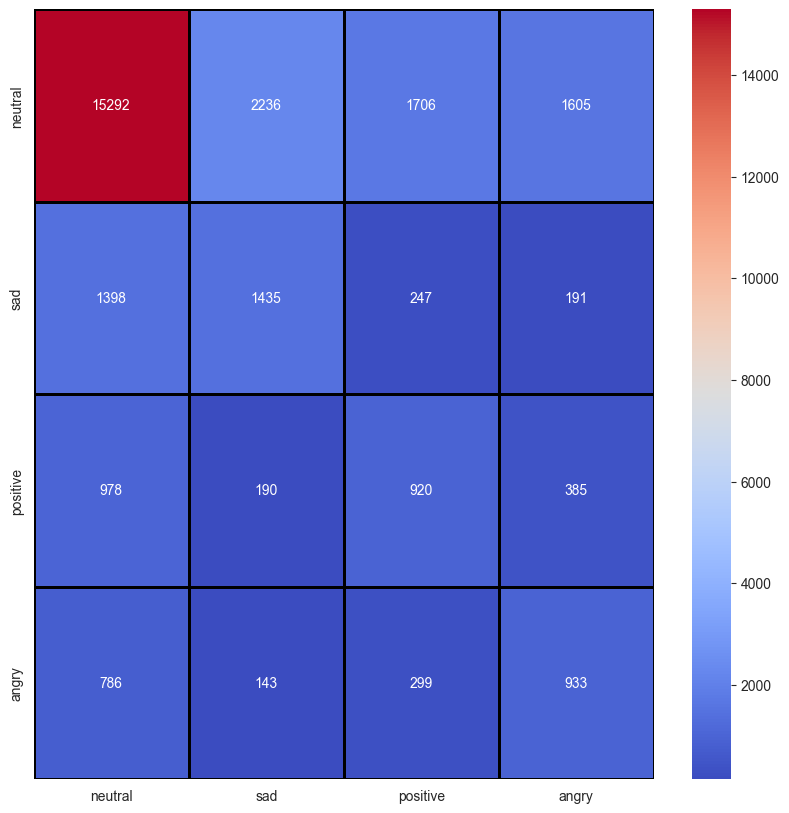

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(true_labels, predictions), annot=True, cmap='coolwarm', linewidths=2, linecolor='black',fmt=str(), xticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}, yticklabels={'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3})
plt.show()

### balanced

In [118]:
train_features_crowd = pd.read_csv('dataset_crowd_cycle_200.csv')
train_features_podcast = pd.read_csv('dataset_podcast_cycle_200.csv')
train_features = pd.concat([train_features_crowd, train_features_podcast])
train_features = train_features.reset_index()
train_features.drop(columns=['index'], inplace=True)
train_features['label'] = train_features['label'].apply(lambda x: x.split()[1])
train_features.dropna(inplace=True)
train_features = train_features[train_features['label'] != 'other']
train_features

,audio_path,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,mfcc_mean11,mfcc_mean12,mfcc_mean13,mfcc_mean14,mfcc_mean15,mfcc_mean16,mfcc_mean17,mfcc_mean18,mfcc_mean19,mfcc_mean20,mfcc_mean21,mfcc_mean22,mfcc_mean23,mfcc_mean24,mfcc_mean25,mfcc_mean26,mfcc_mean27,mfcc_mean28,mfcc_mean29,mfcc_mean30,mfcc_mean31,mfcc_mean32,mfcc_mean33,mfcc_mean34,mfcc_mean35,mfcc_mean36,mfcc_mean37,mfcc_mean38,mfcc_mean39,mfcc_mean40,mfcc_mean41,mfcc_mean42,mfcc_mean43,mfcc_mean44,mfcc_mean45,mfcc_mean46,mfcc_mean47,mfcc_mean48,mfcc_mean49,mfcc_mean50,mfcc_mean51,mfcc_mean52,mfcc_mean53,mfcc_mean54,mfcc_mean55,mfcc_mean56,mfcc_mean57,mfcc_mean58,mfcc_mean59,mfcc_mean60,mfcc_mean61,mfcc_mean62,mfcc_mean63,mfcc_mean64,mfcc_mean65,mfcc_mean66,mfcc_mean67,mfcc_mean68,mfcc_mean69,mfcc_mean70,mfcc_mean71,mfcc_mean72,mfcc_mean73,mfcc_mean74,mfcc_mean75,mfcc_mean76,mfcc_mean77,mfcc_mean78,mfcc_mean79,mfcc_mean80,mfcc_mean81,mfcc_mean82,mfcc_mean83,mfcc_mean84,mfcc_mean85,mfcc_mean86,mfcc_mean87,mfcc_mean88,mfcc_mean89,mfcc_mean90,mfcc_mean91,mfcc_mean92,mfcc_mean93,mfcc_mean94,mfcc_mean95,mfcc_mean96,mfcc_mean97,mfcc_mean98,mfcc_mean99,mfcc_mean100,mfcc_std1,mfcc_std2,mfcc_std3,mfcc_std4,mfcc_std5,mfcc_std6,mfcc_std7,mfcc_std8,mfcc_std9,mfcc_std10,mfcc_std11,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,mfcc_std21,mfcc_std22,mfcc_std23,mfcc_std24,mfcc_std25,mfcc_std26,mfcc_std27,mfcc_std28,mfcc_std29,mfcc_std30,mfcc_std31,mfcc_std32,mfcc_std33,mfcc_std34,mfcc_std35,mfcc_std36,mfcc_std37,mfcc_std38,mfcc_std39,mfcc_std40,mfcc_std41,mfcc_std42,mfcc_std43,mfcc_std44,mfcc_std45,mfcc_std46,mfcc_std47,mfcc_std48,mfcc_std49,mfcc_std50,mfcc_std51,mfcc_std52,mfcc_std53,mfcc_std54,mfcc_std55,mfcc_std56,mfcc_std57,mfcc_std58,mfcc_std59,mfcc_std60,mfcc_std61,mfcc_std62,mfcc_std63,mfcc_std64,mfcc_std65,mfcc_std66,mfcc_std67,mfcc_std68,mfcc_std69,mfcc_std70,mfcc_std71,mfcc_std72,mfcc_std73,mfcc_std74,mfcc_std75,mfcc_std76,mfcc_std77,mfcc_std78,mfcc_std79,mfcc_std80,mfcc_std81,mfcc_std82,mfcc_std83,mfcc_std84,mfcc_std85,mfcc_std86,mfcc_std87,mfcc_std88,mfcc_std89,mfcc_std90,mfcc_std91,mfcc_std92,mfcc_std93,mfcc_std94,mfcc_std95,mfcc_std96,mfcc_std97,mfcc_std98,mfcc_std99,mfcc_std100,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,zero_cross_mn,zero_cross_std,label
0,ea0f98b720247329cb817138c2f628dd.wav,-416.31076,92.022140,8.281179,16.198270,-0.936501,-1.026557,-0.820926,-10.904892,-4.460922,-9.831796,2.414729,-9.357346,-1.262992,-2.283333,-9.902399,0.617525,-6.295304,-1.237704,-0.746776,-5.747520,-0.963644,-1.022405,1.043999,6.829342,4.699425,9.967783,3.387162,6.466811,-1.055453,0.961022,-1.544693,2.375060,-2.158074,-0.052250,-0.717584,0.300643,-1.809443,-0.733228,-5.115393,-1.985247,-3.218359,-3.301126,-3.615870,-2.785368,-2.766621,-1.762610,-2.162419,-1.302676,-1.276341,-0.534420,-1.664901,-0.286600,-2.083095,0.823001,-3.301691,0.290000,-0.978156,-0.069865,-0.970305,-0.211424,0.236216,0.074348,-0.227397,0.778327,-1.166701,-0.664969,-0.281549,0.237870,-0.649346,0.131668,-1.932842,-1.451750,-2.126951,-1.164420,-2.618154,-0.827134,-2.029711,-0.592424,-1.193040,-0.050078,-0.675225,-0.092497,-1.082167,-0.458054,-1.249633,-0.642827,-1.244604,-0.611514,-1.452568,-0.343360,-0.852291,0.319510,-1.267048,-1.226245,-1.681598,-0.954266,-1.668372,-1.499528,-1.723242,-1.148087,105.970600,33.132618,28.013847,23.422653,21.569332,16.596191,11.430403,12.314257,10.125980,8.662791,6.904030,10.394081,6.286224,5.080739,6.273829,6.459737,9.223018,10.254317,6.558453,9.613936,8.224324,6.965076,7.323610,9.409914,13.180948,14.475088,12.208991,11.060138,11.134114,9.059981,9.837153,8.885558,7.699648,8.533421,6.020751,4.279263,4.790843,4.780743,5.203868,4.606727,4.539925,5.174113,4.002665,5.437748,4.714987,5.700115,6.059845,6.026706,4.900537,4.996851,4.482159,5.971661,5.712463,6.629459,5.071481,4.644053,4.241181,3.511219,3.303602,3.570986,3.948244,4.804130,3.557213,4.239606,4

In [119]:
train_features_dr = train_features[train_features['label'] == 'neutral'].sample(40000, random_state=123).index

# Удаление выбранных строк из датафрейма
train_features_balanced = train_features.drop(train_features_dr)

train_features_balanced

,audio_path,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,mfcc_mean11,mfcc_mean12,mfcc_mean13,mfcc_mean14,mfcc_mean15,mfcc_mean16,mfcc_mean17,mfcc_mean18,mfcc_mean19,mfcc_mean20,mfcc_mean21,mfcc_mean22,mfcc_mean23,mfcc_mean24,mfcc_mean25,mfcc_mean26,mfcc_mean27,mfcc_mean28,mfcc_mean29,mfcc_mean30,mfcc_mean31,mfcc_mean32,mfcc_mean33,mfcc_mean34,mfcc_mean35,mfcc_mean36,mfcc_mean37,mfcc_mean38,mfcc_mean39,mfcc_mean40,mfcc_mean41,mfcc_mean42,mfcc_mean43,mfcc_mean44,mfcc_mean45,mfcc_mean46,mfcc_mean47,mfcc_mean48,mfcc_mean49,mfcc_mean50,mfcc_mean51,mfcc_mean52,mfcc_mean53,mfcc_mean54,mfcc_mean55,mfcc_mean56,mfcc_mean57,mfcc_mean58,mfcc_mean59,mfcc_mean60,mfcc_mean61,mfcc_mean62,mfcc_mean63,mfcc_mean64,mfcc_mean65,mfcc_mean66,mfcc_mean67,mfcc_mean68,mfcc_mean69,mfcc_mean70,mfcc_mean71,mfcc_mean72,mfcc_mean73,mfcc_mean74,mfcc_mean75,mfcc_mean76,mfcc_mean77,mfcc_mean78,mfcc_mean79,mfcc_mean80,mfcc_mean81,mfcc_mean82,mfcc_mean83,mfcc_mean84,mfcc_mean85,mfcc_mean86,mfcc_mean87,mfcc_mean88,mfcc_mean89,mfcc_mean90,mfcc_mean91,mfcc_mean92,mfcc_mean93,mfcc_mean94,mfcc_mean95,mfcc_mean96,mfcc_mean97,mfcc_mean98,mfcc_mean99,mfcc_mean100,mfcc_std1,mfcc_std2,mfcc_std3,mfcc_std4,mfcc_std5,mfcc_std6,mfcc_std7,mfcc_std8,mfcc_std9,mfcc_std10,mfcc_std11,mfcc_std12,mfcc_std13,mfcc_std14,mfcc_std15,mfcc_std16,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,mfcc_std21,mfcc_std22,mfcc_std23,mfcc_std24,mfcc_std25,mfcc_std26,mfcc_std27,mfcc_std28,mfcc_std29,mfcc_std30,mfcc_std31,mfcc_std32,mfcc_std33,mfcc_std34,mfcc_std35,mfcc_std36,mfcc_std37,mfcc_std38,mfcc_std39,mfcc_std40,mfcc_std41,mfcc_std42,mfcc_std43,mfcc_std44,mfcc_std45,mfcc_std46,mfcc_std47,mfcc_std48,mfcc_std49,mfcc_std50,mfcc_std51,mfcc_std52,mfcc_std53,mfcc_std54,mfcc_std55,mfcc_std56,mfcc_std57,mfcc_std58,mfcc_std59,mfcc_std60,mfcc_std61,mfcc_std62,mfcc_std63,mfcc_std64,mfcc_std65,mfcc_std66,mfcc_std67,mfcc_std68,mfcc_std69,mfcc_std70,mfcc_std71,mfcc_std72,mfcc_std73,mfcc_std74,mfcc_std75,mfcc_std76,mfcc_std77,mfcc_std78,mfcc_std79,mfcc_std80,mfcc_std81,mfcc_std82,mfcc_std83,mfcc_std84,mfcc_std85,mfcc_std86,mfcc_std87,mfcc_std88,mfcc_std89,mfcc_std90,mfcc_std91,mfcc_std92,mfcc_std93,mfcc_std94,mfcc_std95,mfcc_std96,mfcc_std97,mfcc_std98,mfcc_std99,mfcc_std100,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,zero_cross_mn,zero_cross_std,label
0,ea0f98b720247329cb817138c2f628dd.wav,-416.31076,92.022140,8.281179,16.198270,-0.936501,-1.026557,-0.820926,-10.904892,-4.460922,-9.831796,2.414729,-9.357346,-1.262992,-2.283333,-9.902399,0.617525,-6.295304,-1.237704,-0.746776,-5.747520,-0.963644,-1.022405,1.043999,6.829342,4.699425,9.967783,3.387162,6.466811,-1.055453,0.961022,-1.544693,2.375060,-2.158074,-0.052250,-0.717584,0.300643,-1.809443,-0.733228,-5.115393,-1.985247,-3.218359,-3.301126,-3.615870,-2.785368,-2.766621,-1.762610,-2.162419,-1.302676,-1.276341,-0.534420,-1.664901,-0.286600,-2.083095,0.823001,-3.301691,0.290000,-0.978156,-0.069865,-0.970305,-0.211424,0.236216,0.074348,-0.227397,0.778327,-1.166701,-0.664969,-0.281549,0.237870,-0.649346,0.131668,-1.932842,-1.451750,-2.126951,-1.164420,-2.618154,-0.827134,-2.029711,-0.592424,-1.193040,-0.050078,-0.675225,-0.092497,-1.082167,-0.458054,-1.249633,-0.642827,-1.244604,-0.611514,-1.452568,-0.343360,-0.852291,0.319510,-1.267048,-1.226245,-1.681598,-0.954266,-1.668372,-1.499528,-1.723242,-1.148087,105.970600,33.132618,28.013847,23.422653,21.569332,16.596191,11.430403,12.314257,10.125980,8.662791,6.904030,10.394081,6.286224,5.080739,6.273829,6.459737,9.223018,10.254317,6.558453,9.613936,8.224324,6.965076,7.323610,9.409914,13.180948,14.475088,12.208991,11.060138,11.134114,9.059981,9.837153,8.885558,7.699648,8.533421,6.020751,4.279263,4.790843,4.780743,5.203868,4.606727,4.539925,5.174113,4.002665,5.437748,4.714987,5.700115,6.059845,6.026706,4.900537,4.996851,4.482159,5.971661,5.712463,6.629459,5.071481,4.644053,4.241181,3.511219,3.303602,3.570986,3.948244,4.804130,3.557213,4.239606,4

In [120]:
X = train_features_balanced[train_features_balanced.columns.drop(['label', 'audio_path'])]
y = pd.DataFrame(train_features_balanced[train_features_balanced.columns[-1]])
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=123)


dic = {'neutral': 0, 'sad': 1, 'positive': 2, 'angry': 3}
y_train = y_train['label'].map(dic)
y_train.dropna(inplace=True)
y_test = y_test['label'].map(dic)
y_test.dropna(inplace=True)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()
# Create a PyTorch dataset and dataloader
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=128, shuffle=True)

In [5]:
class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i-1]*2, hidden_dims[i], bidirectional=True))

        self.fc1 = nn.Linear(hidden_dims[-1]*2, 512)  # Добавляем новый полносвязный слой
        self.fc2 = nn.Linear(512, output_dim)  # Изменяем выходной слой на 4 нейрона
        self.hidden_dims = hidden_dims

        self.fc = nn.Linear(hidden_dims[-1]*2, output_dim)
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden


    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
        out = out.squeeze(0)
        out = torch.relu(self.fc1(out))  # Применяем ReLU к выходу нового полносвязного слоя
        out = torch.log_softmax(self.fc2(out), dim=1)  # Применяем log_softmax к выходному слою
        return out, hidden


model = VariableHiddenDimBiLSTM(input_dim=207, hidden_dims=[4096, 2048, 1024], output_dim=4)


model.to(device)
X_test = X_test.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [121]:

import torch.nn.functional as F


class VariableHiddenDimBiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(VariableHiddenDimBiLSTM, self).__init__()
        self.num_layers = len(hidden_dims)
        self.lstm_layers = nn.ModuleList()

        self.lstm_layers.append(nn.LSTM(input_dim, hidden_dims[0], bidirectional=True))

        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_dims[i - 1] * 2, hidden_dims[i], bidirectional=True))

        self.fc1 = nn.Linear(hidden_dims[-1] * 2, 512)  # Добавляем новый полносвязный слой
        self.fc2 = nn.Linear(512, output_dim)  # Изменяем выходной слой на 4 нейрона
        self.hidden_dims = hidden_dims

        self.fc = nn.Linear(hidden_dims[-1] * 2, output_dim)
        self.hidden_dims = hidden_dims

    def init_hidden(self, bs):
        hidden = []
        for i in range(self.num_layers):
            hidden.append((torch.zeros(2, bs, self.hidden_dims[i]), torch.zeros(2, bs, self.hidden_dims[i])))
        return hidden

    def forward(self, X, hidden):
        out = X.unsqueeze(0)
        for i in range(self.num_layers):
            out, hidden[i] = self.lstm_layers[i](out, hidden[i])
            if i == 0:  # Добавляем Dropout после первого скрытого слоя (4096)
                out = F.dropout(out, p=0.7, training=self.training)
            if i == 1:  # Добавляем Dropout после второго скрытого слоя (2048)
                out = F.dropout(out, p=0.6, training=self.training)
            if i == 2:  # Добавляем Dropout после второго скрытого слоя (2048)
                out = F.dropout(out, p=0.5, training=self.training)
        out = out.squeeze(0)
        out = torch.relu(self.fc1(out))
        out = torch.log_softmax(self.fc2(out), dim=1)
        return out, hidden


model = VariableHiddenDimBiLSTM(input_dim=207, hidden_dims=[4096, 2048, 1024], output_dim=4)

model.to(device)
X_test = X_test.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.000001, amsgrad=True)

In [122]:
from tqdm import tqdm
def accuracy(y_pred, y_acc):
    with torch.no_grad():
        return torch.sum(torch.max(torch.exp(y_pred), dim=1)[1] == y_acc).item() / len(y_acc)
def f1_f(y_pred, y_true):
    with torch.no_grad():
        y_pred = torch.max(torch.exp(y_pred), dim=1)[1].cpu().numpy()
        y_true = y_true.cpu().numpy()
        return f1_score(y_true, y_pred, average='weighted')

In [123]:
epochs = 20
trf1 = []
tsf1 =[]
tsa=[]
tra=[]
trls = []
tsls = []
for e in range(1, epochs + 1):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    model.train()
    for batch in tqdm(dataloader_train, leave=True):
        x, y = batch
        x, y = x.cuda(), y.cuda()

        # Initialize the hidden state for each layer
        hidden = model.init_hidden(x.size(0))
        for i in range(len(hidden)):
            hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

        # Forward pass and backprop
        out, hidden = model(x, hidden)
        loss = loss_function(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy(out, y)
        train_f1 += f1_f(out, y)

    # Scale accuracy and losses
    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)
    train_f1 /= len(dataloader_train)

    test_loss = 0
    test_acc = 0
    test_f1 = 0

    with torch.no_grad():
        for batch in tqdm(dataloader_test, leave=True):
            x, y = batch
            x, y = x.cuda(), y.cuda()

            hidden = model.init_hidden(x.size(0))
            for i in range(len(hidden)):
                hidden[i] = (hidden[i][0].to(device), hidden[i][1].to(device))

            out, hidden = model(x, hidden)
            loss = loss_function(out, y)

            test_loss += loss.item()
            test_acc += accuracy(out, y)
            test_f1 += f1_f(out, y)

    test_loss /= len(dataloader_test)
    test_acc /= len(dataloader_test)
    test_f1 /= len(dataloader_test)
    trf1.append(train_f1)
    tsf1.append(test_f1)
    tsa.append(test_acc)
    tra.append(train_acc)
    trls.append(train_loss)
    tsls.append(test_loss)

    print("Epoch {:4} | Train Loss {:.4f} | Train Acc {:.4f} | Train F1 {:.4f} | Test Loss {:.4f} | Test Acc {:.4f} | Test F1 {:.4f}".format(e, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))


    #torch.save(model.state_dict(), f'BILSTM_balanced_{e}.path')

100%|██████████| 260/260 [00:01<00:00, 169.32it/s]


Epoch    1 | Train Loss 1.1098 | Train Acc 0.5180 | Train F1 0.5099 | Test Loss 1.0600 | Test Acc 0.5526 | Test F1 0.5487


100%|██████████| 260/260 [00:01<00:00, 172.26it/s]


Epoch    2 | Train Loss 1.0408 | Train Acc 0.5587 | Train F1 0.5544 | Test Loss 1.0497 | Test Acc 0.5599 | Test F1 0.5520


100%|██████████| 260/260 [00:01<00:00, 169.62it/s]


Epoch    3 | Train Loss 1.0093 | Train Acc 0.5728 | Train F1 0.5687 | Test Loss 1.0190 | Test Acc 0.5697 | Test F1 0.5673


100%|██████████| 260/260 [00:01<00:00, 171.23it/s]


Epoch    4 | Train Loss 0.9887 | Train Acc 0.5837 | Train F1 0.5802 | Test Loss 1.0149 | Test Acc 0.5750 | Test F1 0.5707


100%|██████████| 260/260 [00:01<00:00, 171.00it/s]


Epoch    5 | Train Loss 0.9702 | Train Acc 0.5940 | Train F1 0.5907 | Test Loss 1.0194 | Test Acc 0.5728 | Test F1 0.5679


100%|██████████| 260/260 [00:01<00:00, 158.06it/s]


Epoch    6 | Train Loss 0.9562 | Train Acc 0.5992 | Train F1 0.5961 | Test Loss 1.0084 | Test Acc 0.5755 | Test F1 0.5724


100%|██████████| 260/260 [00:01<00:00, 171.09it/s]


Epoch    7 | Train Loss 0.9452 | Train Acc 0.6059 | Train F1 0.6029 | Test Loss 1.0004 | Test Acc 0.5773 | Test F1 0.5733


100%|██████████| 260/260 [00:01<00:00, 170.78it/s]


Epoch    8 | Train Loss 0.9302 | Train Acc 0.6124 | Train F1 0.6099 | Test Loss 1.0037 | Test Acc 0.5778 | Test F1 0.5771


100%|██████████| 260/260 [00:01<00:00, 174.30it/s]


Epoch    9 | Train Loss 0.9223 | Train Acc 0.6161 | Train F1 0.6137 | Test Loss 1.0061 | Test Acc 0.5745 | Test F1 0.5716


100%|██████████| 260/260 [00:01<00:00, 166.07it/s]


Epoch   10 | Train Loss 0.9102 | Train Acc 0.6225 | Train F1 0.6203 | Test Loss 1.0031 | Test Acc 0.5785 | Test F1 0.5769


100%|██████████| 260/260 [00:01<00:00, 174.75it/s]


Epoch   11 | Train Loss 0.9001 | Train Acc 0.6279 | Train F1 0.6254 | Test Loss 1.0032 | Test Acc 0.5831 | Test F1 0.5809


100%|██████████| 260/260 [00:01<00:00, 172.93it/s]


Epoch   12 | Train Loss 0.8888 | Train Acc 0.6333 | Train F1 0.6313 | Test Loss 1.0089 | Test Acc 0.5794 | Test F1 0.5774


100%|██████████| 260/260 [00:01<00:00, 175.13it/s]


Epoch   13 | Train Loss 0.8791 | Train Acc 0.6351 | Train F1 0.6331 | Test Loss 1.0116 | Test Acc 0.5832 | Test F1 0.5796


100%|██████████| 260/260 [00:01<00:00, 175.81it/s]


Epoch   14 | Train Loss 0.8692 | Train Acc 0.6426 | Train F1 0.6404 | Test Loss 1.0121 | Test Acc 0.5848 | Test F1 0.5831


100%|██████████| 260/260 [00:01<00:00, 172.60it/s]


Epoch   15 | Train Loss 0.8628 | Train Acc 0.6444 | Train F1 0.6424 | Test Loss 1.0140 | Test Acc 0.5812 | Test F1 0.5795


100%|██████████| 260/260 [00:01<00:00, 173.13it/s]


Epoch   16 | Train Loss 0.8503 | Train Acc 0.6511 | Train F1 0.6492 | Test Loss 1.0097 | Test Acc 0.5849 | Test F1 0.5835


100%|██████████| 260/260 [00:01<00:00, 169.49it/s]


Epoch   17 | Train Loss 0.8423 | Train Acc 0.6527 | Train F1 0.6509 | Test Loss 1.0234 | Test Acc 0.5787 | Test F1 0.5781


100%|██████████| 260/260 [00:01<00:00, 168.26it/s]


Epoch   18 | Train Loss 0.8323 | Train Acc 0.6598 | Train F1 0.6581 | Test Loss 1.0201 | Test Acc 0.5838 | Test F1 0.5818


100%|██████████| 260/260 [00:01<00:00, 171.53it/s]


Epoch   19 | Train Loss 0.8230 | Train Acc 0.6623 | Train F1 0.6608 | Test Loss 1.0217 | Test Acc 0.5842 | Test F1 0.5807


100%|██████████| 260/260 [00:01<00:00, 172.47it/s]

Epoch   20 | Train Loss 0.8171 | Train Acc 0.6666 | Train F1 0.6649 | Test Loss 1.0198 | Test Acc 0.5857 | Test F1 0.5835


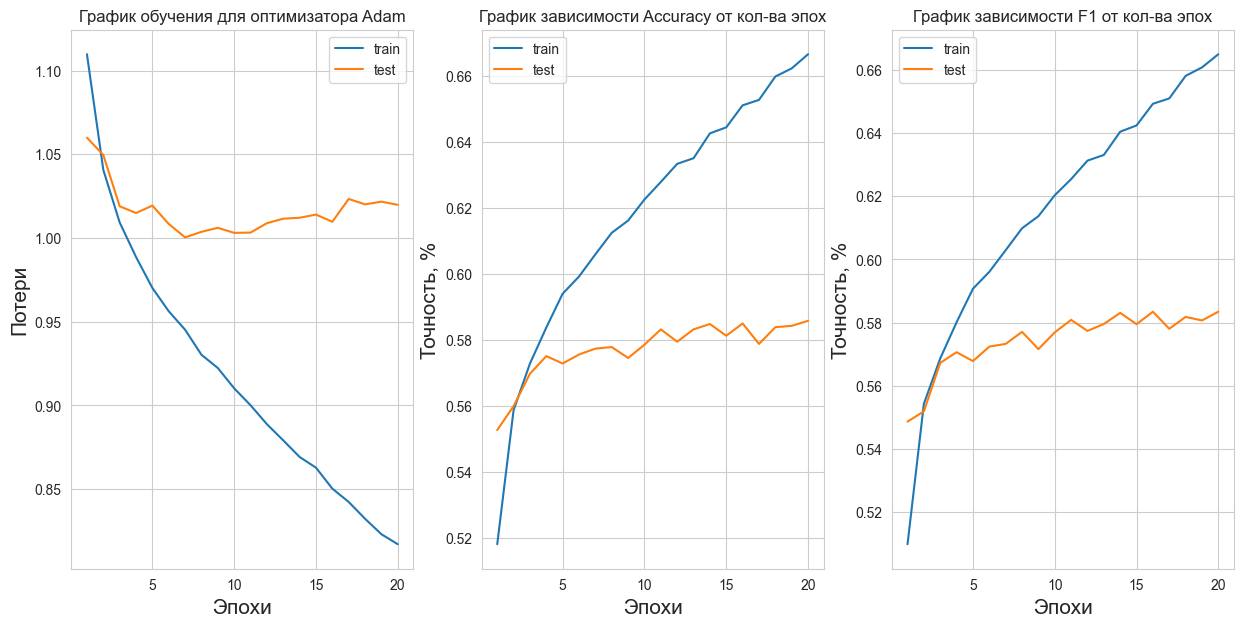

In [124]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.plot(range(1, e + 1), trls, label="train")
plt.plot(range(1, e + 1), tsls, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.title("График обучения для оптимизатора Adam")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(1, e + 1), tra, label="train")
plt.plot(range(1, e + 1), tsa, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости Accuracy от кол-ва эпох")
plt.subplot(1, 3, 3)
plt.plot(range(1, e + 1), trf1, label="train")
plt.plot(range(1, e + 1), tsf1, label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Точность, %", fontsize=15)
plt.legend()
plt.title("График зависимости F1 от кол-ва эпох")
plt.grid
plt.show()